In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read CSV file
df = pd.read_csv('preprocess.csv')
df = df.iloc[70000:]

# Define target variable and features
target = '紫外线（指数）'
labels = df[target]
data = df.drop(columns=[target])

# Standardize features
scaler = StandardScaler()
data = scaler.fit_transform(data)

Linear Regression:

Cross-Validation MSE: 3.66
Cross-Validation MAE: 1.38
Cross-Validation RMSE: 1.91
Cross-Validation R² Score: 0.59


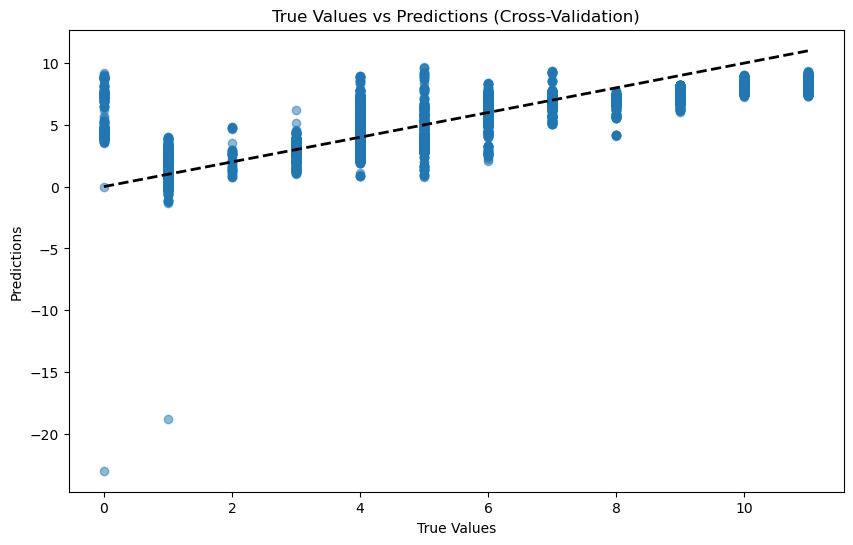

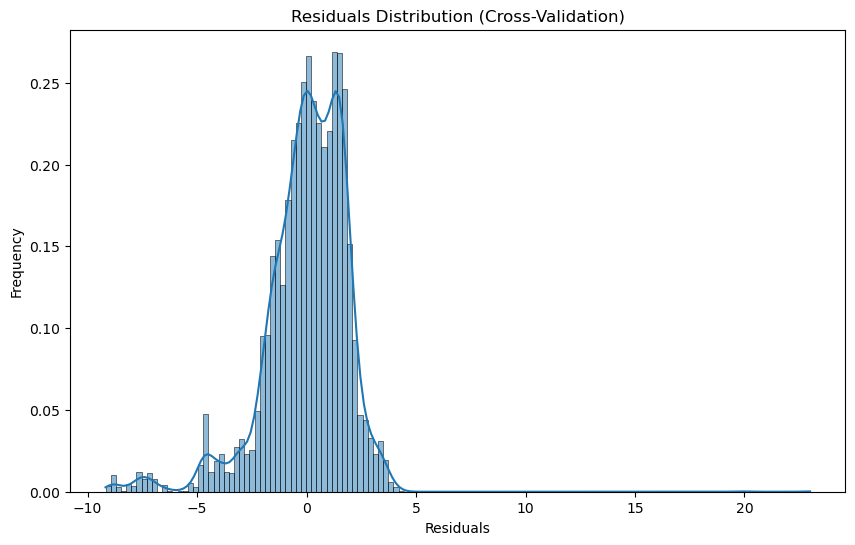

In [3]:
# Linear Regression
print('Linear Regression:\n')

# Initialize the model
model = LinearRegression()

# Perform cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []
residuals_list = []
true_values = []
predictions = []

for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate and store metrics
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))
    
    # Calculate residuals
    residuals = y_test - y_pred
    residuals_list.extend(residuals)
    true_values.extend(y_test)
    predictions.extend(y_pred)

# Calculate average metrics
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

print(f'Cross-Validation MSE: {average_mse:.2f}')
print(f'Cross-Validation MAE: {average_mae:.2f}')
print(f'Cross-Validation RMSE: {average_rmse:.2f}')
print(f'Cross-Validation R² Score: {average_r2:.2f}')

# True vs Prediction plot
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Cross-Validation)')
plt.show()

# Average residual distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals_list, kde=True, stat='density')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Cross-Validation)')
plt.show()


Ridge Regression:

Best hyper-parameter: {'alpha': 1000.0}
Cross-Validation MSE: 3.61
Cross-Validation MAE: 1.40
Cross-Validation RMSE: 1.90
Cross-Validation R² Score: 0.60


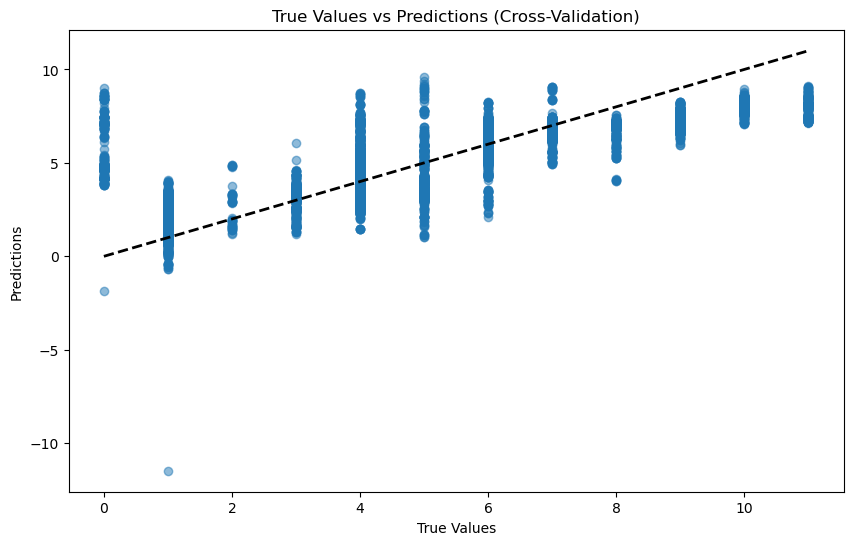

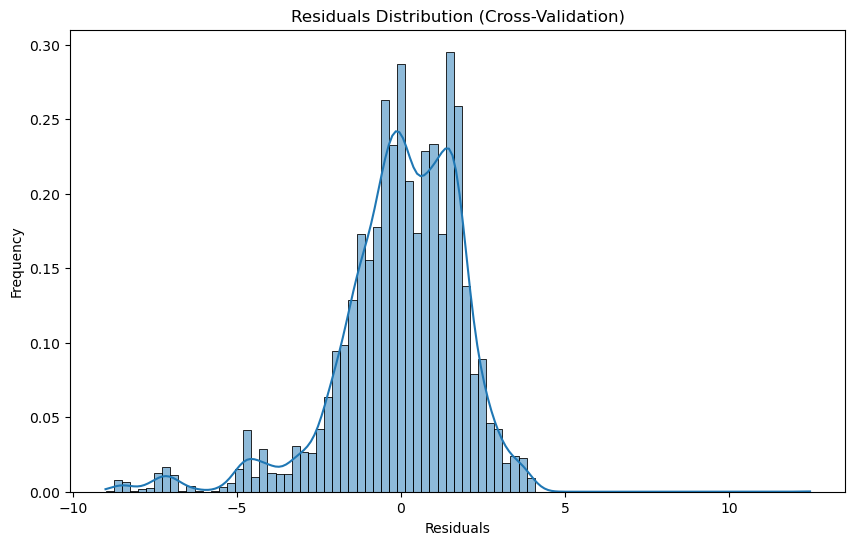

In [4]:
# Ridge Regression
print('Ridge Regression:\n')

# Initialize the model
ridge = Ridge()

# Define hyperparameter grid
param_grid = {'alpha': np.logspace(-6, 6, 13)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(data, labels)

# Best hyper-parameter from grid search
best_params = grid_search.best_params_
print(f'Best hyper-parameter: {best_params}')

# Best model from grid search
best_ridge = grid_search.best_estimator_

# Perform cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []
residuals_list = []
true_values = []
predictions = []

for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
    
    # Train the model
    best_ridge.fit(X_train, y_train)
    
    # Make predictions
    y_pred = best_ridge.predict(X_test)
    
    # Calculate and store metrics
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))
    
    # Calculate residuals
    residuals = y_test - y_pred
    residuals_list.extend(residuals)
    true_values.extend(y_test)
    predictions.extend(y_pred)

# Calculate average metrics
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

print(f'Cross-Validation MSE: {average_mse:.2f}')
print(f'Cross-Validation MAE: {average_mae:.2f}')
print(f'Cross-Validation RMSE: {average_rmse:.2f}')
print(f'Cross-Validation R² Score: {average_r2:.2f}')

# True vs Prediction plot
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Cross-Validation)')
plt.show()

# Average residual distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals_list, kde=True, stat='density')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Cross-Validation)')
plt.show()

Support Vector Regression (SVR):

Best parameters found: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Cross-Validation MSE: 3.13
Cross-Validation MAE: 1.18
Cross-Validation RMSE: 1.77
Cross-Validation R² Score: 0.65


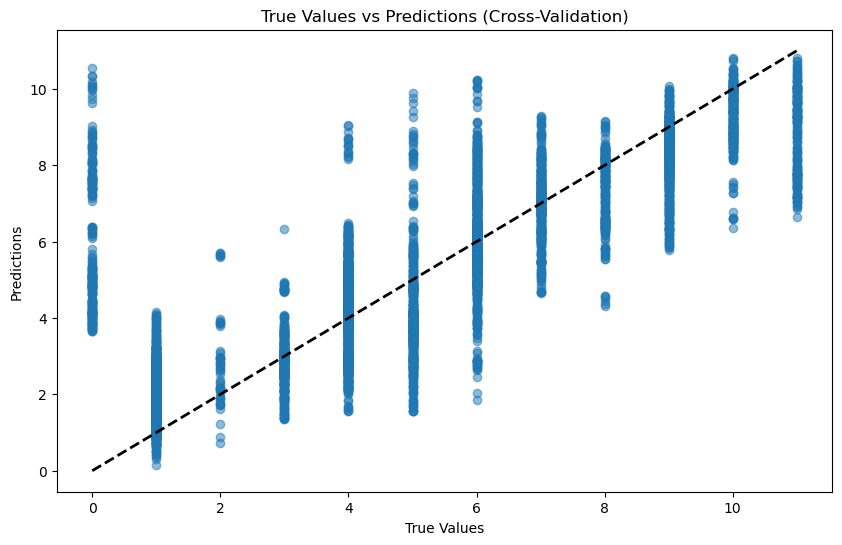

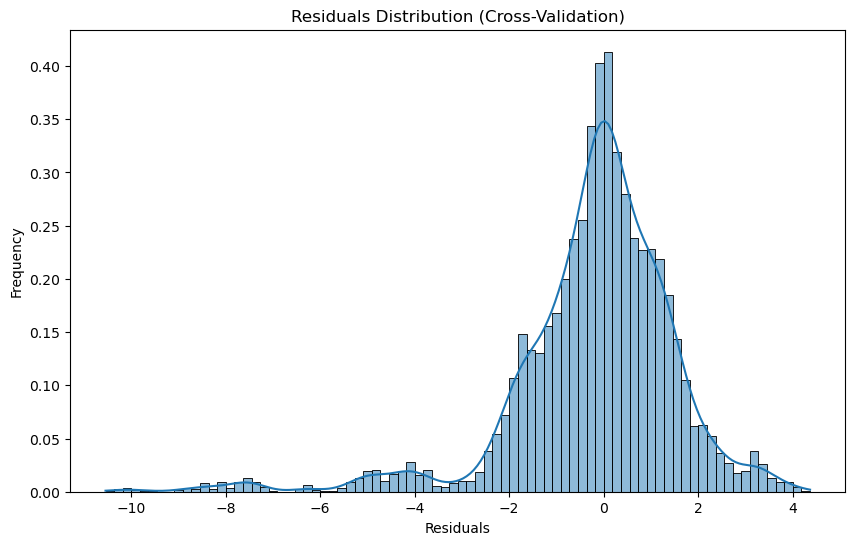

In [5]:
# Support Vector Regression (SVR)
print('Support Vector Regression (SVR):\n')

# Set up the SVR model
model = SVR()

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(data, labels)

# Get the best model
best_model = grid_search.best_estimator_
print(f'Best parameters found: {grid_search.best_params_}')

# Perform cross-validation with the best model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []
residuals_list = []
true_values = []
predictions = []

for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
    
    # Train the best model
    best_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = best_model.predict(X_test)
    
    # Calculate and store metrics
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))
    
    # Calculate residuals
    residuals = y_test - y_pred
    residuals_list.extend(residuals)
    true_values.extend(y_test)
    predictions.extend(y_pred)

# Calculate average metrics
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

print(f'Cross-Validation MSE: {average_mse:.2f}')
print(f'Cross-Validation MAE: {average_mae:.2f}')
print(f'Cross-Validation RMSE: {average_rmse:.2f}')
print(f'Cross-Validation R² Score: {average_r2:.2f}')

# True vs Prediction plot
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Cross-Validation)')
plt.show()

# Average residual distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals_list, kde=True, stat='density')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Cross-Validation)')
plt.show()

K-Nearest Neighbor (KNN):

Best hyper-parameter: {'n_neighbors': 20}
Cross-Validation MSE: 2.32
Cross-Validation MAE: 1.04
Cross-Validation RMSE: 1.52
Cross-Validation R² Score: 0.74


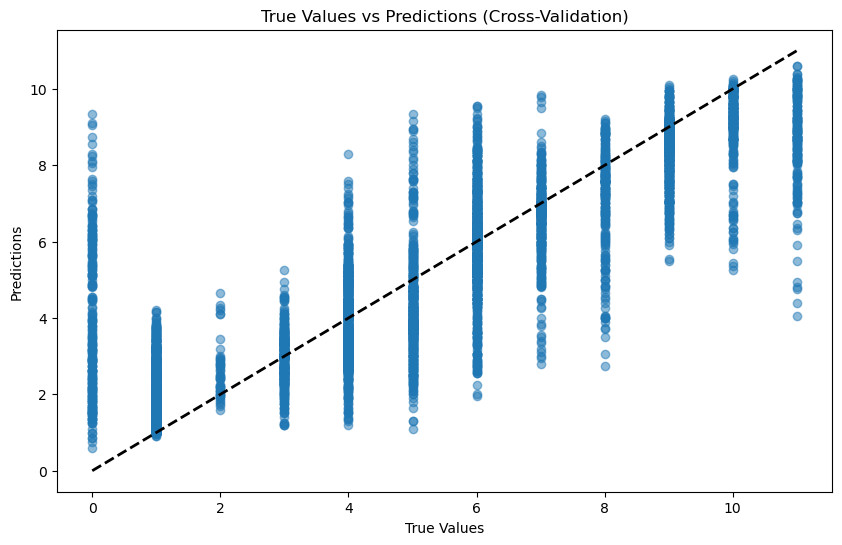

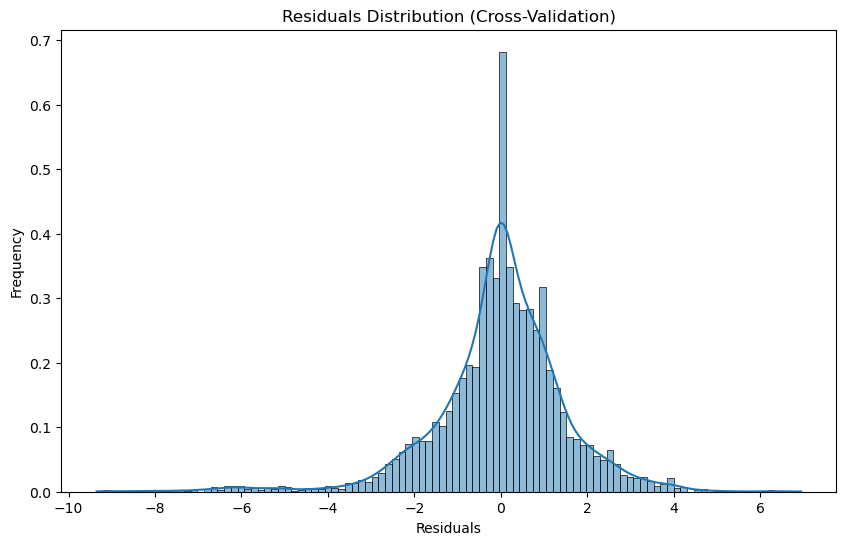

In [6]:
# K-Nearest Neighbor (KNN) 
print('K-Nearest Neighbor (KNN):\n')

# Initialize the KNN model
knn = KNeighborsRegressor()

# Define hyperparameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(data, labels)

# Best hyperparameter from grid search
best_params = grid_search.best_params_
print(f'Best hyper-parameter: {best_params}')

# Best model from grid search
best_knn = grid_search.best_estimator_

# Perform cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []
residuals_list = []
true_values = []
predictions = []

for train_index, test_index in kf.split(data):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]
    
    # Train the model
    best_knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = best_knn.predict(X_test)
    
    # Calculate and store metrics
    mse_scores.append(mean_squared_error(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))
    
    # Calculate residuals
    residuals = y_test - y_pred
    residuals_list.extend(residuals)
    true_values.extend(y_test)
    predictions.extend(y_pred)

# Calculate average metrics
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_rmse = np.mean(rmse_scores)
average_r2 = np.mean(r2_scores)

print(f'Cross-Validation MSE: {average_mse:.2f}')
print(f'Cross-Validation MAE: {average_mae:.2f}')
print(f'Cross-Validation RMSE: {average_rmse:.2f}')
print(f'Cross-Validation R² Score: {average_r2:.2f}')

# True vs Prediction plot
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predictions, alpha=0.5)
plt.plot([min(true_values), max(true_values)], [min(true_values), max(true_values)], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Cross-Validation)')
plt.show()

# Average residual distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals_list, kde=True, stat='density')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Cross-Validation)')
plt.show()

Decision Tree:


Evaluation index of 紫外线（指数）:
Best dt regressor:DecisionTreeRegressor(max_depth=18)
Optimum MSE: 0.84
Training set MSE: 0.14
Training set RMSE: 0.37
Training set MAE: 0.07
Training set R² score: 0.98
Testing set MSE: 0.54
Testing set RMSE: 0.74
Testing set MAE: 0.18
Testing set R² score: 0.93


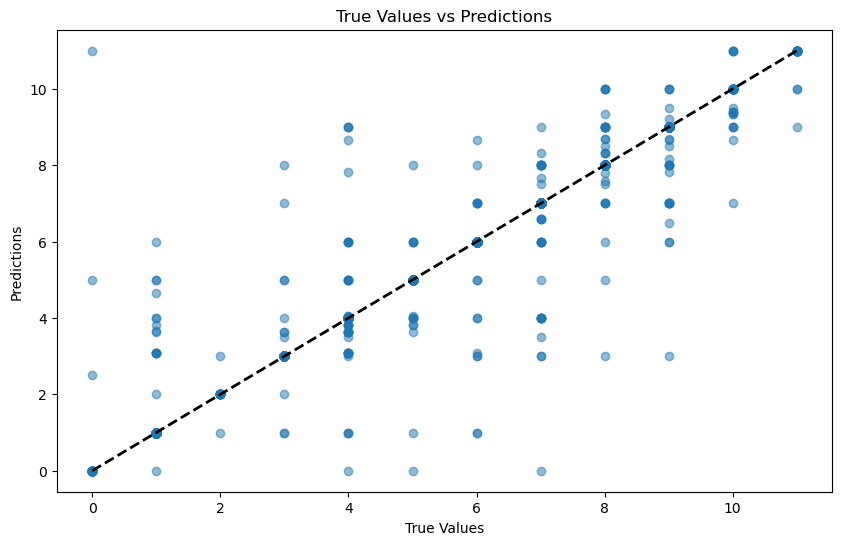

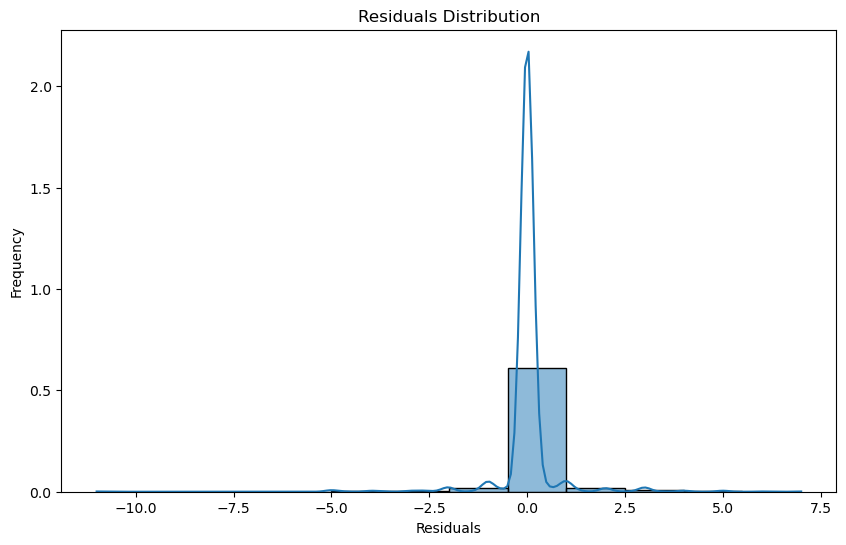

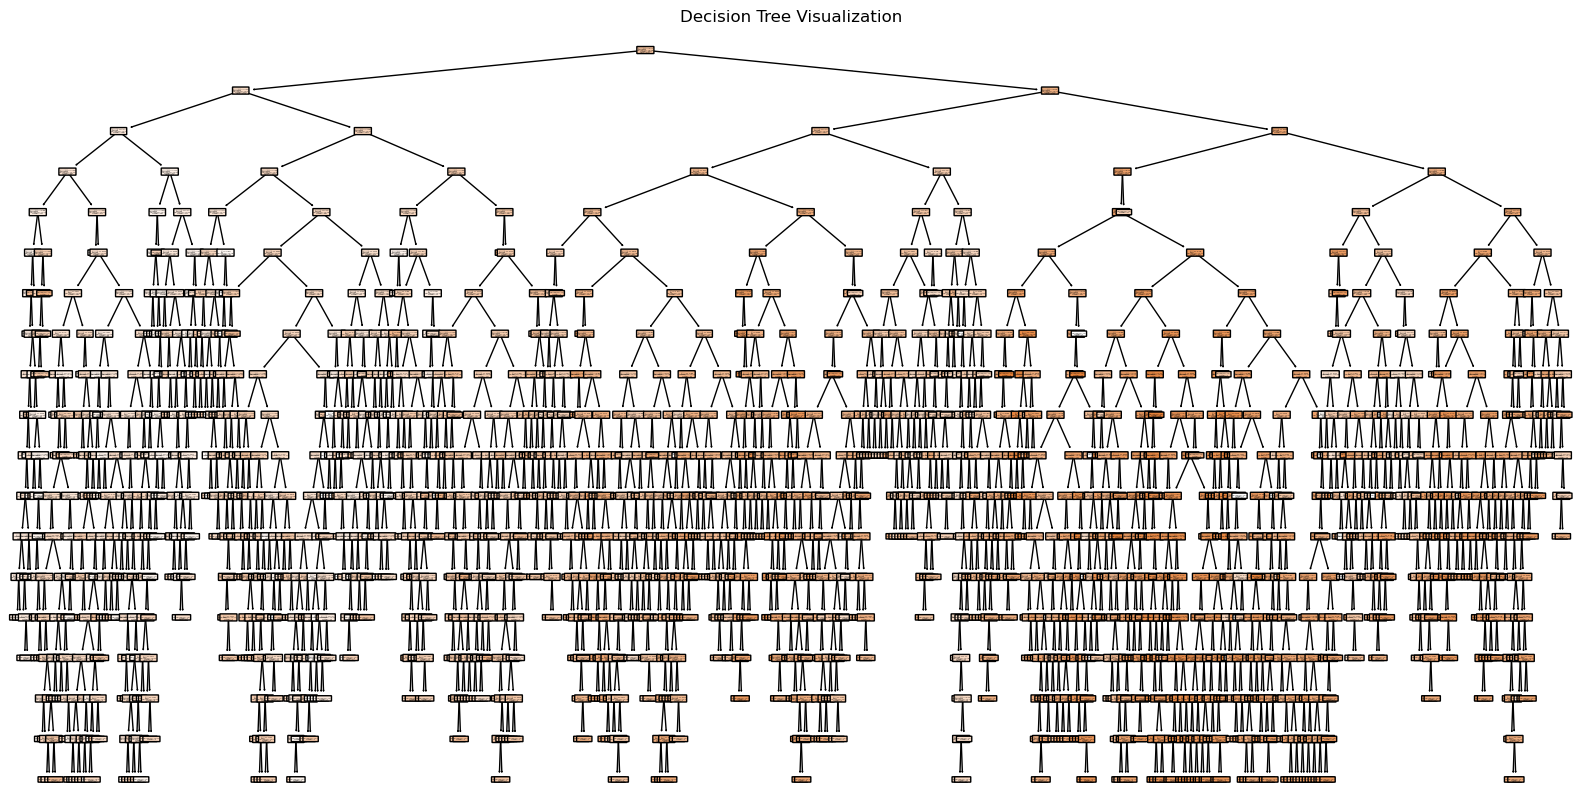

In [7]:
import warnings
# Ignore all UserWarning
warnings.filterwarnings('ignore', category=UserWarning)

# Decision Tree 
print('Decision Tree:\n')

# Read the CSV file
data = pd.read_csv('preprocess.csv')

# Handle missing values
data = data.tail(10000)

# Transform categorical variables into dummy variables and exclude target variables
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Define the target variable
target = '紫外线（指数）'
results = {}

# Set the number of folds and parameter range 
kf = KFold(n_splits=5, shuffle=True, random_state=1)
max_depths = list(range(1, 21))  

# Put the current target variable y and the rest as feature X
X = data.drop(columns=[target])
y = data[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize processing features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
scores = []

# Cross-verify the maximum depth of each tree
for max_depth in max_depths:
    dt_regressor = DecisionTreeRegressor(max_depth=max_depth)
    scores.append(cross_val_score(dt_regressor, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean())

# Find the best score and the corresponding max_depth
best_score_index = scores.index(max(scores))
best_max_depth = max_depths[best_score_index]
best_score = max(scores) * -1  

# Train the model with the best max_depth
best_dt_regressor = DecisionTreeRegressor(max_depth=best_max_depth)
best_dt_regressor.fit(X_train, y_train)

# Predict
y_pred = best_dt_regressor.predict(X_test)
y_train_pred = best_dt_regressor.predict(X_train)

# Calculate the MSE, RMSE, MAE and R² score
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = best_dt_regressor.score(X_train, y_train)

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = best_dt_regressor.score(X_test, y_test)

results = {
    'Optimum MSE': best_score,
    'Training set MSE': train_mse,
    'Training set RMSE': train_rmse,
    'Training set MAE': train_mae,
    'Training set R² score': train_r2,
    'Testing set MSE': test_mse,
    'Testing set RMSE': test_rmse,
    'Testing set MAE': test_mae,
    'Testing set R² score': test_r2
}

# print the results
print(f"\nEvaluation index of {target}:")
print(f"Best dt regressor:{best_dt_regressor}")
for metric, value in results.items():
    print(f"{metric}: {value:.2f}")

# Visualize regression residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, stat='density')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

# Visual decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_regressor, filled=True, feature_names=X.columns, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()